In [4]:
from utilities import bit_str_list
a = bit_str_list(3)
print(a)

['000', '001', '010', '011', '100', '101', '110', '111']


In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, Aer, execute, circuit
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator
circ0 = QuantumCircuit(1)
circ0.x(0)
circ0.z(0)
state0 = Statevector(circ0)

circ1 = QuantumCircuit(1)
circ1.x(0)
circ1.rz(np.pi,0)
state1 = Statevector(circ1)

circ2 = QuantumCircuit(2)
circ2.x(0)
state2 = Statevector(circ2)
print(state0.data)
print(state1.data)
print(state2.data)

state0.equiv(state1)

[ 0.+0.j -1.+0.j]
[0.000000e+00+0.j 6.123234e-17+1.j]
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


True

In [12]:
I = np.array([[1,0],[0,1]])
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
XZ = np.kron(X,Z)
ZX = np.kron(Z,X)
II = np.kron(I,I)
ZXZ = np.kron(Z,XZ)
H = -(np.kron(XZ,II) + np.kron(ZXZ,I) + np.kron(I,ZXZ) + np.kron(II,ZX))
eigvals, eigvecs = np.linalg.eig(H)
print(Z@np.array([[1],[1]]))
#print(H)
#print(eigvals)
#print(eigvecs)

[[ 1]
 [-1]]


In [69]:
import itertools
backend = provider.get_backend('ibm_washington')
test = GraphState(backend)
test.connections

a = PauliList(['III','IXY','IYI'])
b = a.group_qubit_wise_commuting()
#b = 'I'*5
#print(b)
c = ['III','IXY','IIY']
def check_QWC(pauli_string, group):
    QWC = True
    for string in group:
        for i in range(len(pauli_string)):
            if pauli_string[i] != 'I' and string[i] != 'I':
                if pauli_string[i] != string[i]:
                    QWC = False
    return QWC

remove = c.pop(1)
c.insert(0, remove)
print(c)

['IXY', 'III', 'IIY']


range(0, 2)


range

In [29]:
backend = provider.get_backend('ibmq_manila')
run_cal(backend)

In [5]:
a = ['XZ','YZ']
delete = [0]
for i in range(len(a)):
    a[i] = list(map(str, a[i]))
    print(a)
    for j in delete:
        del a[i][j]
    a[i] = ''.join(a[i])
print(a)

[['X', 'Z'], 'YZ']
['Z', ['Y', 'Z']]
['Z', 'Z']


In [7]:
import itertools
lst = [['X','Y','Z'],['X','Y','Z']]
combinations = [p for p in itertools.product(*lst)]
print(combinations)
for basis in combinations:
    a = ''.join(basis)
    print(a)

[('X', 'X'), ('X', 'Y'), ('X', 'Z'), ('Y', 'X'), ('Y', 'Y'), ('Y', 'Z'), ('Z', 'X'), ('Z', 'Y'), ('Z', 'Z')]
XX
XY
XZ
YX
YY
YZ
ZX
ZY
ZZ


In [22]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, Aer, execute, circuit, transpile
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator
circ = QuantumCircuit(7)
circ.h(1)
circ.measure_all()
circ.draw()
backend = provider.get_backend('ibmq_qasm_simulator')
trans_qc = transpile(circ, backend)
raw_counts = backend.run(trans_qc, shots=2048).result().get_counts()

In [28]:
mit = mthree.M3Mitigation(backend)
mit.cals_from_system(range(circ.num_qubits))
filename = f'calibrations/{backend.name()}_cal.json'
mit.cals_to_file(filename)
quasi = mit.apply_correction(raw_counts, range(circ.num_qubits))
probs = quasi.nearest_probability_distribution()
print(quasi)
print(probs)

{'0000000': 0.49560195031024823, '0000010': 0.5043980496897519}
{'0000000': 0.49560195031024823, '0000010': 0.5043980496897519}


In [36]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, Aer, execute, circuit
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator
circ = QuantumCircuit(2)
#circ.h(range(2))
#for i in range(1):
#    circ.cz(i,i+1)

circ.x(0)

print(circ)
Matrix = Operator(circ).data
#print(-Matrix)
eigval, eigvec = np.linalg.eig(-Matrix)

#print(eigval)
#print(eigvec)
state = Statevector(circ)
print(state)
ro = DensityMatrix(state)
a = DensityMatrix(np.ones(4))
#reduced_ro = partial_trace(ro, [1]).data

#state.draw('latex')
print(ro)
#print(reduced_ro)
ro.data**2

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
DensityMatrix([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [5]:
backend = provider.get_backend('ibmq_manila')
test = GraphState(backend)

delays_ns = list(range(0,41000,1000))
delays = test.format_delays(delays_ns, unit='ns')
increment = delays[1]-delays[0]

test.gen_delay_circuit(delays[3], increment, dynamic_decoupling='pdd')
test.gen_full_qst_circuits()
test.delay_circuit.draw()
test.full_qst_circuits['XYZXX'].draw()

┌───┐       ░ ┌─────────────────┐┌───┐┌─────────────────┐┌───┐»
   q_0: ┤ H ├─■─────░─┤ Delay(1024[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├»
        ├───┤ │     ░ ├─────────────────┤├───┤├─────────────────┤├───┤»
   q_1: ┤ H ├─■──■──░─┤ Delay(1024[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├»
        ├───┤    │  ░ ├─────────────────┤├───┤├─────────────────┤├───┤»
   q_2: ┤ H ├─■──■──░─┤ Delay(1024[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├»
        ├───┤ │     ░ ├─────────────────┤├───┤├─────────────────┤├───┤»
   q_3: ┤ H ├─■──■──░─┤ Delay(1024[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├»
        ├───┤    │  ░ ├─────────────────┤├───┤├─────────────────┤├───┤»
   q_4: ┤ H ├────■──░─┤ Delay(1024[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├»
        └───┘       ░ └─────────────────┘└───┘└─────────────────┘└───┘»
meas: 5/══════════════════════════════════════════════════════════════»
                                                                      »
«        ┌─────────────────┐┌───┐┌─────────────────┐┌───┐┌─────────────────┐»
«   q_0: ┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├»
«        ├─────────────────┤├───┤├─────────────────┤├───┤├─────────────────┤»
«   q_1: ┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├»
«        ├─────────────────┤├───┤├─────────────────┤├───┤├─────────────────┤»
«   q_2: ┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├»
«        ├─────────────────┤├───┤├─────────────────┤├───┤├─────────────────┤»
«   q_3: ┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├»
«        ├─────────────────┤├───┤├─────────────────┤├───┤├─────────────────┤»
«   q_4: ┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(2096[dt]) ├»
«        └─────────────────┘└───┘└─────────────────┘└───┘└─────────────────┘»
«meas: 5/═══════════════════════════════════════════════════════════════════»
«                                                                           »
«        ┌───┐┌─────────────────┐┌───┐┌─────────────────┐ ┌───┐       ░ ┌─┐   »
«   q_0: ┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(1024[dt]) ├─┤ H ├───────░─┤M├───»
«        ├───┤├─────────────────┤├───┤├─────────────────┤┌┴───┴┐┌───┐ ░ └╥┘┌─┐»
«   q_1: ┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(1024[dt]) ├┤ Sdg ├┤ H ├─░──╫─┤M├»
«        ├───┤├─────────────────┤├───┤├─────────────────┤└─────┘└───┘ ░  ║ └╥┘»
«   q_2: ┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(1024[dt]) ├─────────────░──╫──╫─»
«        ├───┤├─────────────────┤├───┤├─────────────────┤ ┌───┐       ░  ║  ║ »
«   q_3: ┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(1024[dt]) ├─┤ H ├───────░──╫──╫─»
«        ├───┤├─────────────────┤├───┤├─────────────────┤ ├───┤       ░  ║  ║ »
«   q_4: ┤ X ├┤ Delay(2096[dt]) ├┤ X ├┤ Delay(1024[dt]) ├─┤ H ├───────░──╫──╫─»
«        └───┘└─────────────────┘└───┘└─────────────────┘ └───┘       ░  ║  ║ »
«meas: 5/════════════════════════════════════════════════════════════════╩══╩═»
«                                                                        0  1 »
«                 
«   q_0: ─────────
«                 
«   q_1: ─────────
«        ┌─┐      
«   q_2: ┤M├──────
«        └╥┘┌─┐   
«   q_3: ─╫─┤M├───
«         ║ └╥┘┌─┐
«   q_4: ─╫──╫─┤M├
«         ║  ║ └╥┘
«meas: 5/═╩══╩══╩═
«         2  3  4

In [2]:
from time import time
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from qiskit import transpile, ClassicalRegister
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider

from utilities import startup, bit_str_list, run_cal
from graphstate import GraphState, calc_negativities, calc_n_mean, plot_cxerr_corr, BS_list_even
from entanglebase import EntangleBase

hub = "ibm-q-melbourne"
group = "unimelb"
project = "hub"
backend_name = 'ibmq_jakarta'
hgp = f"{hub}/{group}/{project}"

#provider = IBMProvider()
#backend = provider.get_backend(backend_name, instance=hgp)
provider = startup()

Account enabled
Provider: ibm-q-melbourne-unimelb-hub


In [3]:
a = GraphState.bit_str_to_BellState('0011')
print(a)

#BS_list_even[3].measure_all()
BS_list_even[3].draw()
#BS_list_even[3].qasm()

BS_4


┌───┐     ┌───┐┌───┐┌───┐
q_0: ┤ H ├──■──┤ X ├┤ Z ├┤ H ├
     └───┘┌─┴─┐└───┘└───┘└───┘
q_1: ─────┤ X ├───────────────
          └───┘

In [6]:
#backend = provider.get_backend('ibm_oslo')
test = GraphState(backend)
test.gen_teleportation_basis()
print(test.teleportation_basis)
test.gen_teleported_BellState_circuit(post_processing = False)
test.teleported_BellState_circuits[1][(0,2)].draw('mpl')
test.gen_teleported_qst_circuits()
test.teleported_BellState_circuits_qst[1][(0,2)]['ZZ'].draw('mpl')
#test.teleported_BellState_circuits_qst[2][(0,4)]['ZZ'].qasm()

jobs = test.run_teleported_qst_circuits(reps=1, shots=4096, qrem=False, sim='ideal')
print(len(jobs.result().results))

#print(jobs.result().get_counts('2-(0, 5)-ZZ-0'))
#qst_counts, qst_pvecs = test.teleported_counts_from_result(jobs.result(), post_processing = True)
#qst_counts_mit, qst_pvecs_mit = test.apply_qrem_teleported_counts(qst_counts, qst_pvecs)
#pvecs_binned = test.bin_teleported_pvecs(qst_counts_mit, qst_pvecs_mit)

rho_dict_list = test.recon_teleported_density_mats(jobs.result(), post_processing= False, apply_mit = False)
print(rho_dict_list[0][1][(0,2)])
n_list = calc_teleported_negativities(rho_dict_list, post_processing = False, mode = 'all')
print(n_list[0][1][(0,2)])

#pvecs_binned = test.bin_teleported_pvecs_from_dynamic_circuits(qst_counts_mit, qst_pvecs_mit)
#print(qst_counts[0][3][(0,4)]['ZZ']) #0th rep, gap = 2, pair = (0,5), basis = ZZ
#print(qst_pvecs[0][3][(0,4)]['ZZ'])
#print(qst_counts_mit[0][3][(0,4)]['ZZ'])
#print(qst_pvecs_mit[0][3][(0,4)]['ZZ'])
#print(pvecs_binned[0][3][(0,4)]['BS_4']['ZZ'])

{1: {(0, 2): {'X': [1], 'Z': [5, 6, 4, 3]}, (0, 3): {'X': [1], 'Z': [5, 6, 4, 2]}, (1, 5): {'X': [3], 'Z': [6, 4, 2, 0]}, (2, 3): {'X': [1], 'Z': [5, 6, 4, 0]}, (3, 4): {'X': [5], 'Z': [6, 1, 2, 0]}, (3, 6): {'X': [5], 'Z': [4, 1, 2, 0]}, (4, 6): {'X': [5], 'Z': [3, 1, 2, 0]}}, 2: {(0, 5): {'X': [1, 3], 'Z': [6, 4, 2]}, (1, 4): {'X': [3, 5], 'Z': [6, 2, 0]}, (1, 6): {'X': [3, 5], 'Z': [4, 2, 0]}, (2, 5): {'X': [1, 3], 'Z': [6, 4, 0]}}, 3: {(0, 4): {'X': [1, 3, 5], 'Z': [6, 2]}, (0, 6): {'X': [1, 3, 5], 'Z': [4, 2]}, (2, 4): {'X': [1, 3, 5], 'Z': [6, 0]}, (2, 6): {'X': [1, 3, 5], 'Z': [4, 0]}}}
135
[[ 5.00786592e-01-1.59517407e-18j -2.34027668e-03-4.76811152e-03j
  -7.39327080e-03-1.75876528e-03j  4.98403047e-01-1.60397791e-03j]
 [-2.34027668e-03+4.76811152e-03j  6.66631087e-04+9.94197116e-19j
  -2.89964553e-04-4.60447811e-04j -1.27973747e-03+5.09561107e-03j]
 [-7.39327080e-03+1.75876528e-03j -2.89964553e-04+4.60447811e-04j
   5.66059051e-04+7.09955006e-19j -8.15434588e-03+2.25731005e-0

In [2]:
backend = provider.get_backend('ibmq_manila')
test = GraphState(backend)

delays_ns = list(range(0,41000,1000))
delays = test.format_delays(delays_ns, unit='ns')
increment = delays[1]-delays[0]

test.gen_delay_circuit(delays[2], increment, dynamic_decoupling=False)

test.gen_entanglement_witness_intactness_circuits()
test.entanglement_witness_intactness_circuits['Mx'].draw()

job = test.run_entanglement_witness_intactness_circuits(reps=3, shots=8192, qrem=True, sim='ideal')

#pvecs = test.pvecs_Mx_Mz_from_result(job.result())
#print(pvecs)

#expected_values = test.Mx_Mz_from_result(pvecs)
#print(expected_values)
lower_bounds_list = test.find_entanglement_witness_intactness(job.result(), qrem = True)
print(lower_bounds_list)

[7, 7, 7]


In [4]:
backend = provider.get_backend('ibmq_jakarta')
test = GraphState(backend, qubits_to_connect=[0,1,2,3,4,5])

#state = Statevector(test.circuit)
#ro = DensityMatrix(state).data

#delays_ns = list(range(0,41000,1000))
#delays = test.format_delays(delays_ns, unit='ns')
#increment = delays[1]-delays[0]

#test.gen_delay_circuit(delays[2], increment, dynamic_decoupling=True)

test.gen_full_qst_circuits()

job = test.run_full_qst_circuits(reps=1, shots=4096, qrem=True, sim='ideal')

#test.full_qst_pvecs_from_result(job.result())
rho_list = test.recon_full_density_mats(job.result(), apply_mit = 'qrem')
fidelities = test.find_fidelities_to_GraphState(rho_list)

print(fidelities)
#test.full_qst_circuits['XYZYX'].draw()

[(0.9772812224155092+9.486769009248164e-18j)]


In [5]:
from qiskit.converters import circuit_to_dag, dag_to_circuit
from collections import OrderedDict

def remove_idle_qwires(circ):
    dag = circuit_to_dag(circ)

    idle_wires = list(dag.idle_wires())
    for w in idle_wires:
        dag._remove_idle_wire(w)
        dag.qubits.remove(w)

    dag.qregs = OrderedDict()

    return dag_to_circuit(dag)

circ = remove_idle_qwires(test.circuit)
circ.swap(0,5)
circ.swap(1,4)
circ.swap(2,3)
display(circ.draw())
state = Statevector(circ)
rho_true = DensityMatrix(state.data, dims=2**6)
print(rho_true)

┌───┐                  
0: ┤ H ├─■────────X───────
   ├───┤ │        │       
1: ┤ H ├─■──■──■──┼──X────
   ├───┤    │  │  │  │    
2: ┤ H ├────■──┼──┼──┼──X─
   ├───┤       │  │  │  │ 
3: ┤ H ├─■─────■──┼──┼──X─
   ├───┤ │        │  │    
4: ┤ H ├─┼──■─────┼──X────
   ├───┤ │  │     │       
5: ┤ H ├─■──■─────X───────
   └───┘

DensityMatrix([[ 0.015625+0.j,  0.015625+0.j,  0.015625+0.j, ...,
                 0.015625+0.j, -0.015625-0.j, -0.015625-0.j],
               [ 0.015625+0.j,  0.015625+0.j,  0.015625+0.j, ...,
                 0.015625+0.j, -0.015625-0.j, -0.015625-0.j],
               [ 0.015625+0.j,  0.015625+0.j,  0.015625+0.j, ...,
                 0.015625+0.j, -0.015625-0.j, -0.015625-0.j],
               ...,
               [ 0.015625+0.j,  0.015625+0.j,  0.015625+0.j, ...,
                 0.015625+0.j, -0.015625-0.j, -0.015625-0.j],
               [-0.015625+0.j, -0.015625+0.j, -0.015625+0.j, ...,
                -0.015625+0.j,  0.015625+0.j,  0.015625+0.j],
               [-0.015625+0.j, -0.015625+0.j, -0.015625+0.j, ...,
                -0.015625+0.j,  0.015625+0.j,  0.015625+0.j]],
              dims=(2, 2, 2, 2, 2, 2))


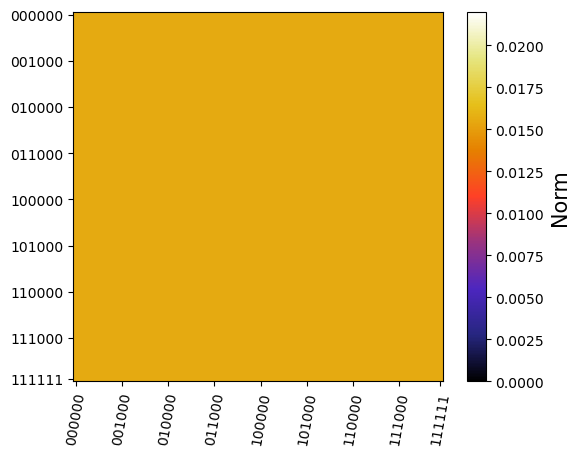

In [33]:
import matplotlib as mpl
#cmap = mpl.colormaps['hsv']
#plt.imshow(np.angle(rho_true), cmap=cmap)
plt.imshow(np.abs(rho_true), cmap=plt.cm.CMRmap)
#cmap=plt.cm.CMRmap
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
#im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
label_list = ['000000', '001000', '010000', '011000', '100000', '101000','110000','111000','111111']
phase_ticks = ['-π', '-2π/3','-π/3','0','π/3','2π/3','π']
plt.xticks([0,8,16,24,32,40,48,56,63], label_list)
plt.yticks([0,8,16,24,32,40,48,56,63], label_list)
plt.tick_params(axis='x', labelrotation=80)
plt.clim(0, 0.022)
#plt.clim(-np.pi, np.pi)
cb = plt.colorbar(orientation='vertical', label='Norm')
#cb = plt.colorbar(orientation='vertical', label='Phase', 
#                  ticks=[-np.pi, -2*np.pi/3, -np.pi/3, 0, np.pi/3, 2*np.pi/3, np.pi])
#cb.ax.set_yticklabels(phase_ticks)
cb.set_label(label = 'Norm', size=15)
plt.show()

In [3]:
import mthree
circuit_inv = test.circuit.copy()
#circuit_inv.x(range(test.nqubits))
state = Statevector(circuit_inv).data

ro = [np.outer(state, state.conjugate())]

#ro = [DensityMatrix(circuit_inv).data]
print(ro)

fidelities = test.find_fidelities_to_GraphState(ro)
print(fidelities)
#plt.imshow(np.abs(ro))
#plt.colorbar()
#plt.show()
circuit_inv.draw()

[array([[ 0.03125+0.j,  0.03125+0.j,  0.03125+0.j, ...,  0.03125+0.j,
        -0.03125-0.j,  0.03125+0.j],
       [ 0.03125+0.j,  0.03125+0.j,  0.03125+0.j, ...,  0.03125+0.j,
        -0.03125-0.j,  0.03125+0.j],
       [ 0.03125+0.j,  0.03125+0.j,  0.03125+0.j, ...,  0.03125+0.j,
        -0.03125-0.j,  0.03125+0.j],
       ...,
       [ 0.03125+0.j,  0.03125+0.j,  0.03125+0.j, ...,  0.03125+0.j,
        -0.03125-0.j,  0.03125+0.j],
       [-0.03125+0.j, -0.03125+0.j, -0.03125+0.j, ..., -0.03125+0.j,
         0.03125+0.j, -0.03125+0.j],
       [ 0.03125+0.j,  0.03125+0.j,  0.03125+0.j, ...,  0.03125+0.j,
        -0.03125-0.j,  0.03125+0.j]])]
[(0.9999999999999991+0j)]


┌───┐      
q_0: ┤ H ├─■────
     ├───┤ │    
q_1: ┤ H ├─■──■─
     ├───┤    │ 
q_2: ┤ H ├─■──■─
     ├───┤ │    
q_3: ┤ H ├─■──■─
     ├───┤    │ 
q_4: ┤ H ├────■─
     └───┘